<a href="https://colab.research.google.com/github/Osama789/Machine_Learning_Project/blob/main/Liver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [ ]:
liver_dataset=pd.read_csv('/content/nafld1.csv')
liver_dataset.head() #to show 5 rows

,Unnamed: 0,id,age,male,weight,height,bmi,case.id,futime,status
0,3631,1,57,0,60.0,163.0,22.690939,10630.0,6261,0
1,8458,2,67,0,70.4,168.0,24.884028,14817.0,624,0
2,6298,3,53,1,105.8,186.0,30.453537,3.0,1783,0
3,15398,4,56,1,109.3,170.0,37.830100,6628.0,3143,0
4,13261,5,68,1,NaN,NaN,NaN,1871.0,1836,1


In [ ]:
liver_dataset.shape

(17549, 10)

In [ ]:
liver_dataset['status'].value_counts()

0    16185
1     1364
Name: status, dtype: int64

In [ ]:
c = pd.DataFrame(liver_dataset)
null_values = liver_dataset.isnull().sum()
X_1 = liver_dataset.fillna(liver_dataset.mean())


In [ ]:
print(null_values)

Unnamed: 0       0
id               0
age              0
male             0
weight        4786
height        3168
bmi           4961
case.id         31
futime           0
status           0
dtype: int64


In [ ]:
print(X_1)

       age        bmi
0       57  22.690939
1       67  24.884028
2       53  30.453537
3       56  37.830100
4       68        NaN
...    ...        ...
17544   46  20.501023
17545   52  47.335905
17546   59        NaN
17547   61        NaN
17548   69  29.204650

[17549 rows x 2 columns]


In [ ]:
X_1=liver_dataset.drop(columns= ['Unnamed: 0','status','weight','id','male','height','case.id','futime'],axis=1)
print(X)

       age        bmi
0       57  22.690939
1       67  24.884028
2       53  30.453537
3       56  37.830100
4       68        NaN
...    ...        ...
17544   46  20.501023
17545   52  47.335905
17546   59        NaN
17547   61        NaN
17548   69  29.204650

[17549 rows x 2 columns]


In [ ]:
y= liver_dataset['status']

In [ ]:
print(X)

       age        bmi
0       57  22.690939
1       67  24.884028
2       53  30.453537
3       56  37.830100
4       68        NaN
...    ...        ...
17544   46  20.501023
17545   52  47.335905
17546   59        NaN
17547   61        NaN
17548   69  29.204650

[17549 rows x 2 columns]


In [ ]:
x=X.fillna(value=X['bmi'].mean())
print(x)

       age        bmi
0       57  22.690939
1       67  24.884028
2       53  30.453537
3       56  37.830100
4       68  30.073865
...    ...        ...
17544   46  20.501023
17545   52  47.335905
17546   59  30.073865
17547   61  30.073865
17548   69  29.204650

[17549 rows x 2 columns]


In [ ]:
print(y)

0        0
1        0
2        0
3        0
4        1
        ..
17544    0
17545    0
17546    0
17547    1
17548    0
Name: status, Length: 17549, dtype: int64


In [ ]:
X = pd.DataFrame(X)
null_values = X.isnull().sum()
X_filled = X.fillna(X.mean())


In [ ]:
scaler=StandardScaler()

In [ ]:
scaler.fit(x)

StandardScaler()

In [ ]:
s= scaler.transform(x)


In [ ]:
print(s)

[[ 0.29481953 -1.23034532]
 [ 0.97407065 -0.86487287]
 [ 0.02311908  0.06327138]
 ...
 [ 0.43066975  0.        ]
 [ 0.56651998  0.        ]
 [ 1.10992087 -0.14485238]]


In [ ]:
x=s

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [ ]:
print(X_train.shape,X_test.shape)


(14039, 2) (3510, 2)


In [ ]:
classifier = svm.SVC(kernel='linear')

In [ ]:
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [ ]:
X_train_prediction=classifier.predict(X_train)

In [ ]:
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)

In [ ]:
print(training_data_accuracy)


0.9222879122444618


In [ ]:
X_test_prediction = classifier.predict(X_test)

In [ ]:
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)

In [ ]:
print(test_data_accuracy)

0.9222222222222223


In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb=GaussianNB()

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)
gnb.fit(X_train,Y_train)

GaussianNB()

In [ ]:
X_train_prediction_2=gnb.predict(X_train)
training_data_accuracy_1=accuracy_score(X_train_prediction_2,Y_train)

In [ ]:
print(training_data_accuracy_1)

0.9239262055701973


In [ ]:
X_test_prediction_1 = gnb.predict(X_test)
training_data_accuracy_2=accuracy_score(X_test_prediction_1,Y_test)
print(training_data_accuracy_2)

0.9259259259259259


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, Y_train)

RandomForestClassifier()

In [ ]:
X_train_prediction_3=rf.predict(X_train)
training_data_accuracy_2=accuracy_score(X_train_prediction_3,Y_train)
print(training_data_accuracy_2)

0.9822636939952988


In [ ]:
X_test_prediction_2 = rf.predict(X_test)
training_data_accuracy_3=accuracy_score(X_test_prediction_2,Y_test)
print(training_data_accuracy_3)

0.9025641025641026


In [ ]:
from sklearn.model_selection import cross_val_score
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
k_fold = 5
cross_val_scores = cross_val_score(rf_classifier, X_train, Y_train, cv=k_fold, scoring='accuracy')
print("Cross-validation scores:", cross_val_scores)
mean_accuracy = cross_val_scores.mean()
print("Mean Accuracy:", mean_accuracy)

Cross-validation scores: [0.90349003 0.90064103 0.91452991 0.91168091 0.9045244 ]
Mean Accuracy: 0.9069732567238802


In [ ]:
from sklearn.metrics import precision_score
precision = precision_score(X_test_prediction_2,Y_test)
print(precision)

0.20512820512820512


In [ ]:
precision_2 = precision_score(X_test_prediction,Y_test)
print(precision_2)

0.0


In [ ]:
precision_3 = precision_score(X_test_prediction_1,Y_test)
print(precision_3)

0.05860805860805861


In [ ]:
from sklearn.metrics import recall_score
recall_1 = recall_score(X_test_prediction,Y_test)
recall_2 = recall_score(X_test_prediction_1,Y_test)
recall_3 = recall_score(X_test_prediction_2,Y_test)
print(recall_1,recall_2,recall_3,precision,precision_2,precision_3)

0.0 0.8421052631578947 0.30939226519337015 0.20512820512820512 0.0 0.05860805860805861


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import confusion_matrix
cm_1 = confusion_matrix(X_test_prediction,Y_test)
cm_2 = confusion_matrix(X_test_prediction_1,Y_test)
cm_3 = confusion_matrix(X_test_prediction_2,Y_test)
print(cm_1,cm_2,cm_3)

[[3237  273]
 [   0    0]] [[3234  257]
 [   3   16]] [[3112  217]
 [ 125   56]]


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

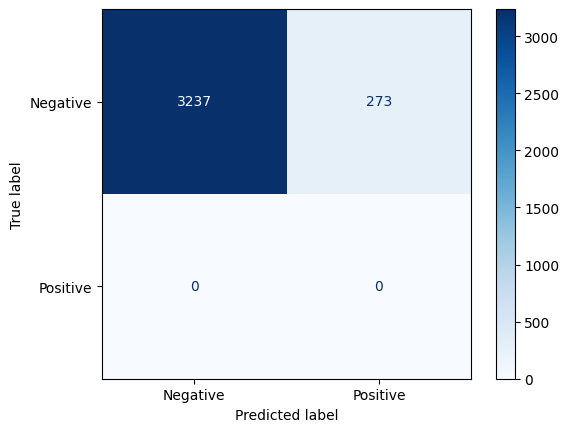

In [ ]:
cm_1_disp=ConfusionMatrixDisplay(confusion_matrix=cm_1,display_labels=["Negative", "Positive"])
cm_1_disp.plot(cmap=plt.cm.Blues, values_format=".0f")

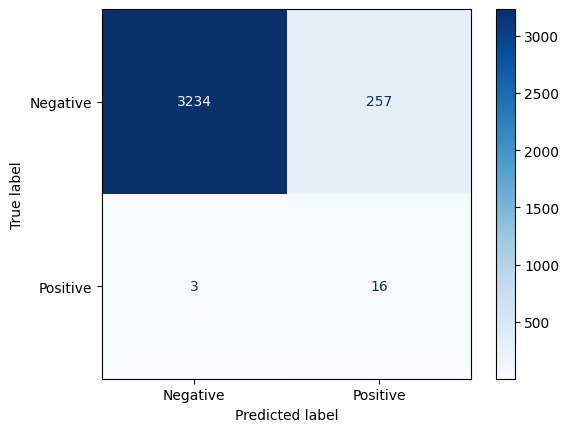

In [ ]:
cm_2_disp=ConfusionMatrixDisplay(confusion_matrix=cm_2,display_labels=["Negative", "Positive"])
cm_2_disp.plot(cmap=plt.cm.Blues, values_format=".0f")

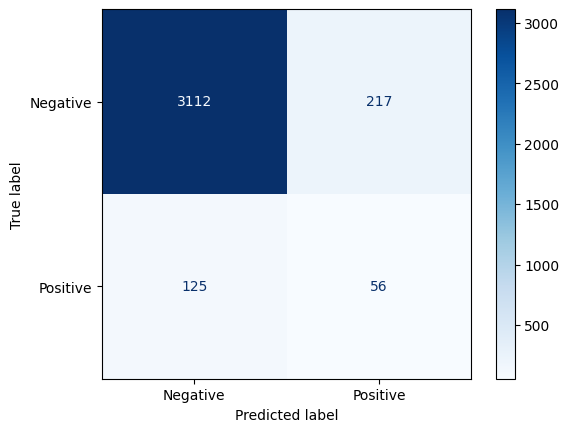

In [ ]:
cm_3_disp=ConfusionMatrixDisplay(confusion_matrix=cm_3,display_labels=["Negative", "Positive"])
cm_3_disp.plot(cmap=plt.cm.Blues, values_format=".0f")

In [ ]:
from sklearn.metrics import f1_score
f1_1 = f1_score(X_test_prediction,Y_test)
f1_2 = f1_score(X_test_prediction_1,Y_test)
f1_3 = f1_score(X_test_prediction_2,Y_test)
print(f1_1,f1_2,f1_3)

0.0 0.10958904109589042 0.2466960352422907


In [ ]:
from sklearn.metrics import cohen_kappa_score
kappa_1 = cohen_kappa_score(X_test_prediction,Y_test)
kappa_2 = cohen_kappa_score(X_test_prediction_1,Y_test)
kappa_3 = cohen_kappa_score(X_test_prediction_2,Y_test)
print(kappa_1,kappa_2,kappa_3)

0.0 0.10048435457830407 0.19688983979543906
